In [ ]:
import pandas as pd

# Loading the dataset
india_violence_data = pd.read_csv('https://www.dropbox.com/scl/fi/rnhn88bfzbo26ugq408rj/IndiaPoliticalViolence-no-Islands_Kashmir_Ladakh.csv?rlkey=9676jgcbhjb2kv9azkg998jiv&e=1&st=tl0p1bzr&dl=1')

# Displaying the dataset for inspection
india_violence_data

,year,month,day,latitude,longitude,fatalities,event_type,sub_event_type,source,notes
0,2016,1,5,17.6800,83.2016,0,Violence against civilians,Abduction/forced disappearance,Chandigarh Tribune,A group of Maoists abduct and shot a TDP: Telu...
1,2016,1,5,17.6800,83.2016,0,Violence against civilians,Abduction/forced disappearance,Chandigarh Tribune,A group of Maoists abduct and shot a TDP: Telu...
2,2019,4,11,16.2349,80.0493,0,Violence against civilians,Abduction/forced disappearance,New Indian Express,"Assumed on 11 Apr, in Narasaraopet tehsil (Gun..."
3,2019,4,11,16.2349,80.0493,0,Violence against civilians,Abduction/forced disappearance,New Indian Express,"Assumed on 11 Apr, in Narasaraopet tehsil (Gun..."
4,2017,1,16,17.8619,82.1970,0,Violence against civilians,Abduction/forced disappearance,South Asia Terrorism Portal,"On 16 January 2017, six tribals were abducted ..."
...,...,...,...,...,...,...,...,...,...,...
36378,2019,6,9,26.1634,89.1838,0,Protests,Excessive force against protesters,Indo-Asian News Service; Times of India,"On 9 June 2019, BJP supporters were attacked b..."
36379,2019,6,14,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,"On 14 June 2019, rioters pelted stones at medi..."
36380,2019,6,14,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,"On 14 June 2019, rioters pelted stones at medi..."
36381,2019,7,17,22.8664,88.4011,0,Protests,Excessive force against protesters,Indian Express,"On 17 July 2019, local residents protesting ag..."


In [ ]:
# Preprocessing

# Check for missing values
print("Missing Values:")
print(india_violence_data.isnull().sum())

Missing Values:
year              0
month             0
day               0
latitude          0
longitude         0
fatalities        0
event_type        0
sub_event_type    0
source            0
notes             0
dtype: int64


In [ ]:
# Remove duplicates if any
india_violence_data.drop_duplicates(inplace=True)

In [ ]:
# Displaying basic information about the India political violence dataset
india_violence_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19575 entries, 0 to 36381
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            19575 non-null  int64  
 1   month           19575 non-null  int64  
 2   day             19575 non-null  int64  
 3   latitude        19575 non-null  float64
 4   longitude       19575 non-null  float64
 5   fatalities      19575 non-null  int64  
 6   event_type      19575 non-null  object 
 7   sub_event_type  19575 non-null  object 
 8   source          19575 non-null  object 
 9   notes           19575 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.6+ MB


In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
india_violence_data.describe()


Summary Statistics:


,year,month,day,latitude,longitude,fatalities
count,19575.000000,19575.000000,19575.000000,19575.000000,19575.000000,19575.000000
mean,2019.649706,6.235556,15.525824,23.530003,83.102861,0.368072
std,2.205414,3.260080,8.796069,4.979786,6.526623,1.093584
min,2016.000000,1.000000,1.000000,8.090000,68.714000,0.000000
25%,2018.000000,4.000000,8.000000,21.287800,77.224400,0.000000
50%,2019.000000,6.000000,15.000000,24.250800,82.155400,0.000000
75%,2022.000000,9.000000,23.000000,26.625800,88.374700,0.000000
max,2024.000000,12.000000,31.000000,32.720600,96.346000,40.000000


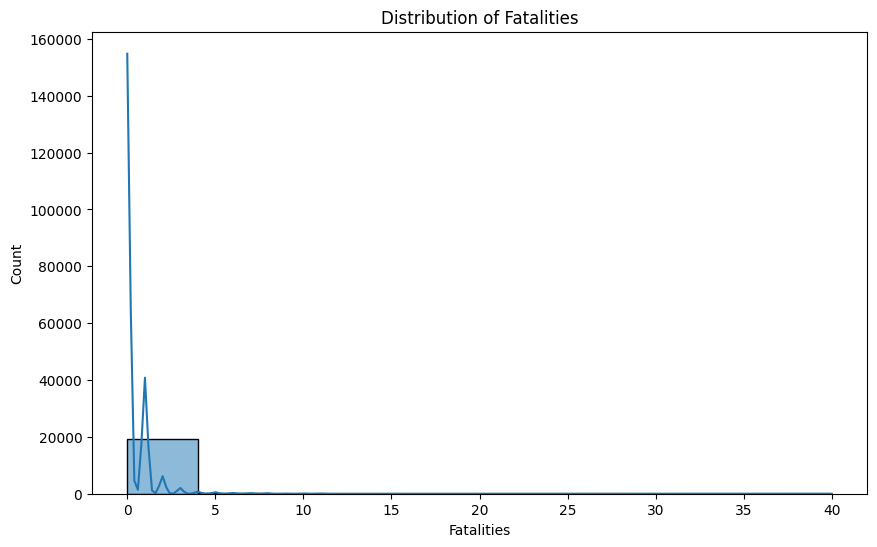

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of fatalities
plt.figure(figsize=(10, 6))
sns.histplot(india_violence_data['fatalities'], bins=10, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Count')
plt.show()

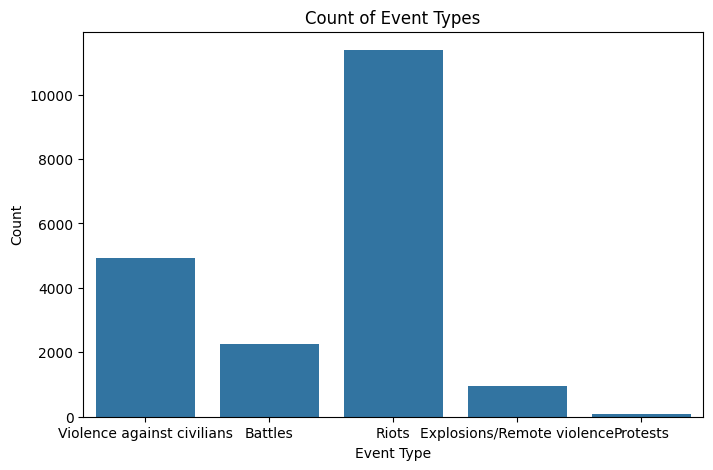

In [ ]:
# Count plot of event types
plt.figure(figsize=(8, 5))
sns.countplot(x='event_type', data=india_violence_data)
plt.title('Count of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

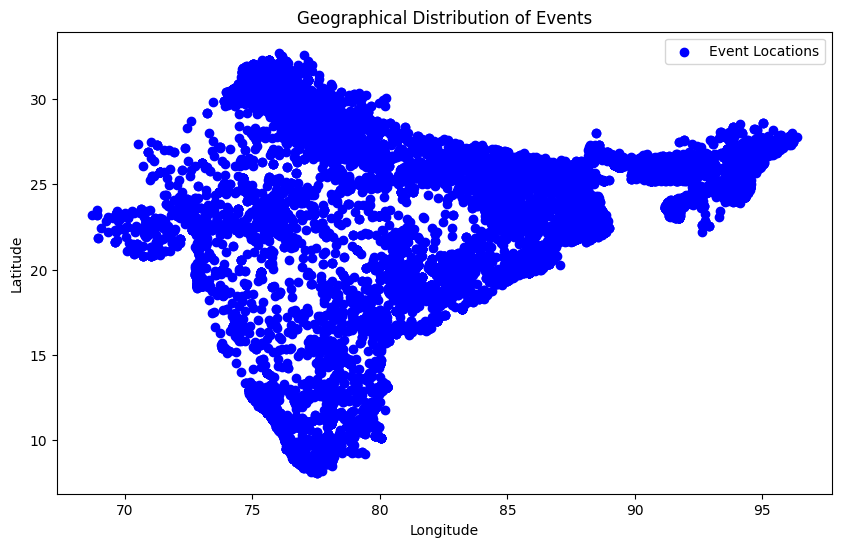

In [ ]:
# Geographical scatter plot of events
plt.figure(figsize=(10, 6))
plt.scatter(india_violence_data['longitude'], india_violence_data['latitude'], c='blue', marker='o', label='Event Locations')
plt.title('Geographical Distribution of Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

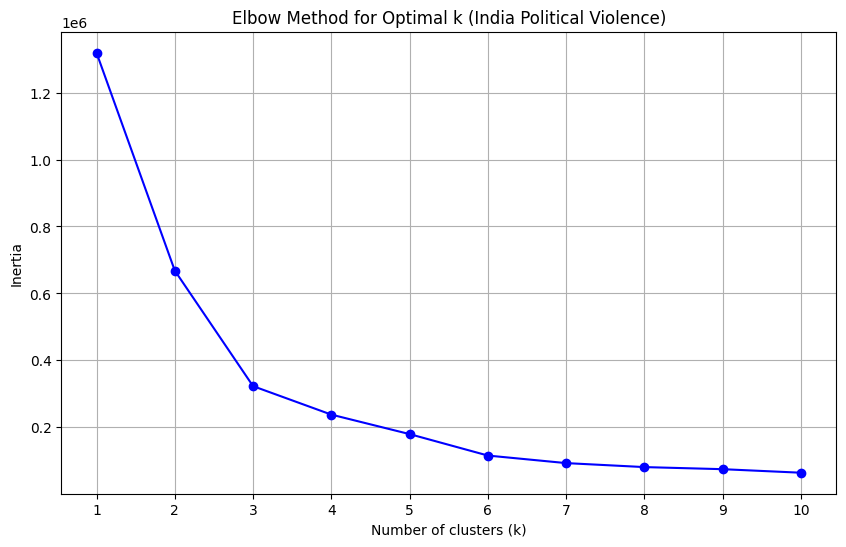

In [ ]:
from sklearn.cluster import KMeans
#Elbow Method for Optimal Clusters

# Prepare data for KMeans clustering
coords = india_violence_data[['latitude', 'longitude']]

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Trying from 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k (India Political Violence)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

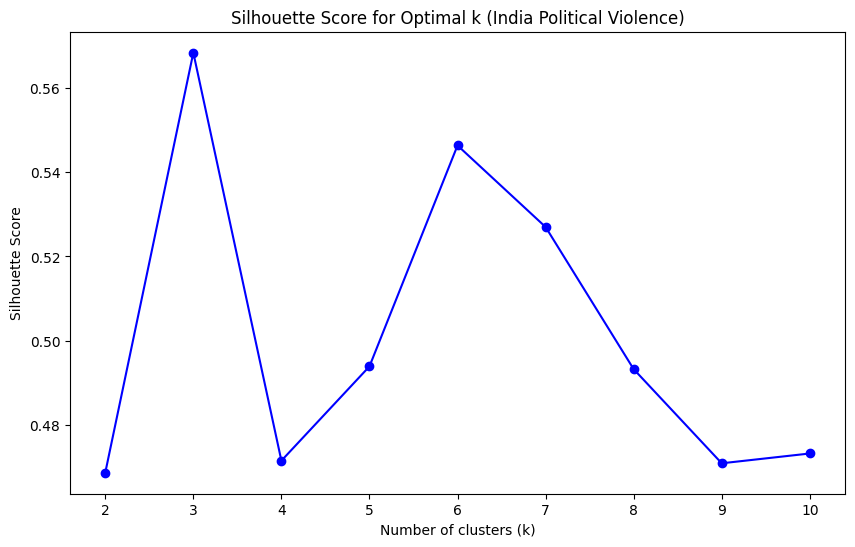

In [ ]:
from sklearn.metrics import silhouette_score
# Silhouette Score for Validation

silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for k in range(2, 11):  # From 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(coords)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(coords, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Silhouette Score for Optimal k (India Political Violence)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# K-Means Clustering with Optimal Number of Clusters

# Using the optimal number of clusters
optimal_clusters = 3  # You can decide based on the Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(coords)
india_violence_data['cluster'] = kmeans.labels_

In [ ]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the assigned cluster for each data point
labels = kmeans.labels_

print("Cluster Centers:", cluster_centers)
print("Cluster Labels:", labels[:10])

Cluster Centers: [[16.24842195 78.83863675]
 [27.79145107 76.79648635]
 [24.28393464 89.1216646 ]]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Display the updated DataFrame with cluster labels
print("\nK-Means Clustering Results with Optimal Clusters:")
india_violence_data


K-Means Clustering Results with Optimal Clusters:


,year,month,day,latitude,longitude,fatalities,event_type,sub_event_type,source,notes,cluster
0,2016,1,5,17.6800,83.2016,0,Violence against civilians,Abduction/forced disappearance,Chandigarh Tribune,A group of Maoists abduct and shot a TDP: Telu...,0
2,2019,4,11,16.2349,80.0493,0,Violence against civilians,Abduction/forced disappearance,New Indian Express,"Assumed on 11 Apr, in Narasaraopet tehsil (Gun...",0
4,2017,1,16,17.8619,82.1970,0,Violence against civilians,Abduction/forced disappearance,South Asia Terrorism Portal,"On 16 January 2017, six tribals were abducted ...",0
6,2020,3,11,14.1990,78.9455,0,Violence against civilians,Abduction/forced disappearance,Hans India,"On 11 March 2020, YSRCP members abducted a TDP...",0
8,2016,2,21,17.6606,82.2098,2,Battles,Armed clash,Times of India,Two Maoists were killed in an exchange of fire...,0
...,...,...,...,...,...,...,...,...,...,...,...
36373,2018,2,16,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,DYFI staged a protest in Kolkata on 16 Februar...,2
36375,2019,1,22,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,"On 22 January 2019, animal rights activists we...",2
36377,2019,6,9,26.1634,89.1838,0,Protests,Excessive force against protesters,Indo-Asian News Service; Times of India,"On 9 June 2019, BJP supporters were attacked b...",2
36379,2019,6,14,22.5728,88.3747,0,Protests,Excessive force against protesters,Indian Express,"On 14 June 2019, rioters pelted stones at medi...",2


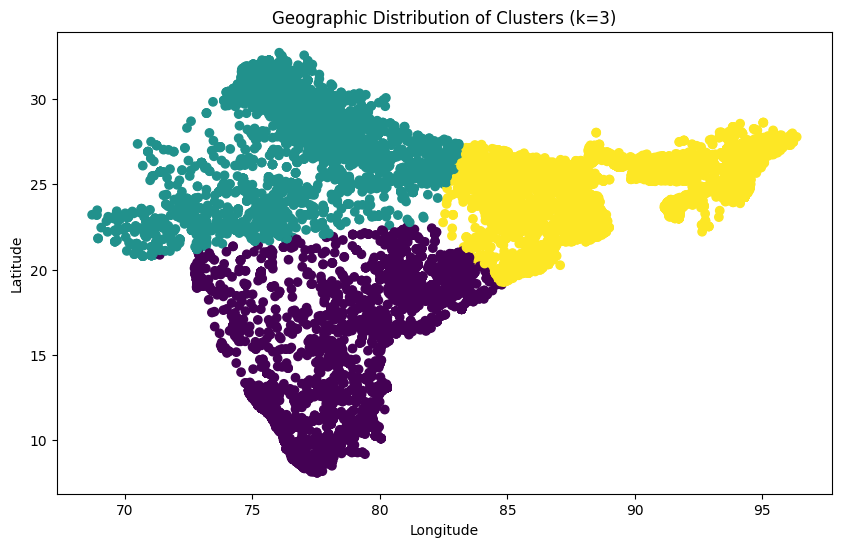

In [ ]:
# Visualize the clustering results on the map
plt.figure(figsize=(10, 6))
plt.scatter(india_violence_data['longitude'], india_violence_data['latitude'], c=india_violence_data['cluster'], cmap='viridis', marker='o', label='Clustered Locations')
plt.title(f'Geographic Distribution of Clusters (k={optimal_clusters})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Calculate average fatalities per cluster
fatalities_by_cluster = india_violence_data.groupby('cluster')['fatalities'].mean()
fatalities_by_cluster

,fatalities
cluster,
0,0.575613
1,0.247281
2,0.346183


In [ ]:
# Count the event types in each cluster
event_types_by_cluster = india_violence_data.groupby(['cluster', 'event_type']).size().unstack(fill_value=0)
event_types_by_cluster

event_type,Battles,Explosions/Remote violence,Protests,Riots,Violence against civilians
cluster,,,,,
0,855,309,11,2046,1183
1,264,46,27,4080,1467
2,1123,585,43,5256,2280


In [ ]:
# Loading the dataset
us_shootings_data = pd.read_excel('https://mth522.wordpress.com/wp-content/uploads/2024/10/fatal-police-shootings-data-continental-us.xls')

# Displaying the dataset for inspection
us_shootings_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,latitude,longitude,is_geocoding_exact
0,6479,La Garion Lamar Smith,2021-01-03,shot,gun,27.0,M,B,Homestead,FL,False,attack,Foot,False,25.437,-80.475,True
1,3734,Juvan Simon,2018-05-30,shot,gun,23.0,M,B,Florida City,FL,False,undetermined,Not fleeing,False,25.461,-80.480,True
2,647,Edward Foster III,2015-07-16,shot,gun,35.0,M,B,Homestead,FL,False,attack,Not fleeing,False,25.462,-80.493,True
3,1480,Francis Scot Dufore,2016-04-20,shot,gun,41.0,M,W,Homestead,FL,False,attack,Not fleeing,False,25.493,-80.484,True
4,916,Jorge Santiago Tapia,2015-10-15,shot,gun,15.0,M,H,Miami,FL,False,attack,Car,False,25.507,-80.413,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,4352,Kevin Shawn Hanson,2019-01-06,shot,gun,42.0,M,B,Hurricane,WV,False,attack,Car,False,NaN,NaN,True
6470,4442,Eric Young,2019-02-11,shot,unarmed,34.0,M,W,Montgomery,WV,True,other,Not fleeing,False,NaN,NaN,True
6471,4954,William Biggs,2019-08-05,shot,gun,43.0,M,W,Pocahontas County,WV,False,attack,Car,False,NaN,NaN,True
6472,6200,NaN,2020-10-01,shot,gun,NaN,M,NaN,Whitby,WV,False,attack,Car,False,NaN,NaN,True


In [ ]:
# Preprocessing

# Check for missing values
print("Missing Values:")
print(us_shootings_data.isnull().sum())

# Drop rows with missing latitude or longitude
us_shootings_data = us_shootings_data.dropna(subset=['latitude', 'longitude'])

# Verification Check for missing values
print("Missing Values:")
print(us_shootings_data.isnull().sum())

Missing Values:
id                           0
name                       262
date                         0
manner_of_death              0
armed                      203
age                        304
gender                       3
race                       711
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       472
body_camera                  0
latitude                   303
longitude                  303
is_geocoding_exact           0
dtype: int64
Missing Values:
id                           0
name                       243
date                         0
manner_of_death              0
armed                      194
age                        283
gender                       2
race                       665
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       458
body_camera              

In [ ]:
# Remove duplicates if any
us_shootings_data.drop_duplicates(inplace=True)

<ipython-input-19-95761f04c086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_shootings_data.drop_duplicates(inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder where needed
label_encoder = LabelEncoder()
us_shootings_data['manner_of_death_encoded'] = label_encoder.fit_transform(us_shootings_data['manner_of_death'])
us_shootings_data['armed_encoded'] = label_encoder.fit_transform(us_shootings_data['armed'])
us_shootings_data['gender_encoded'] = label_encoder.fit_transform(us_shootings_data['gender'])
us_shootings_data['race_encoded'] = label_encoder.fit_transform(us_shootings_data['race'])
us_shootings_data['threat_level_encoded'] = label_encoder.fit_transform(us_shootings_data['threat_level'])
us_shootings_data['flee_encoded'] = label_encoder.fit_transform(us_shootings_data['flee'])

<ipython-input-20-99c09847d652>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_shootings_data['manner_of_death_encoded'] = label_encoder.fit_transform(us_shootings_data['manner_of_death'])
<ipython-input-20-99c09847d652>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_shootings_data['armed_encoded'] = label_encoder.fit_transform(us_shootings_data['armed'])
<ipython-input-20-99c09847d652>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
# Displaying basic information about the India political violence dataset
us_shootings_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6171 entries, 0 to 6170
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       6171 non-null   int64         
 1   name                     5928 non-null   object        
 2   date                     6171 non-null   datetime64[ns]
 3   manner_of_death          6171 non-null   object        
 4   armed                    5977 non-null   object        
 5   age                      5888 non-null   float64       
 6   gender                   6169 non-null   object        
 7   race                     5506 non-null   object        
 8   city                     6171 non-null   object        
 9   state                    6171 non-null   object        
 10  signs_of_mental_illness  6171 non-null   bool          
 11  threat_level             6171 non-null   object        
 12  flee                     5713 non-null 

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
us_shootings_data.describe()


Summary Statistics:


,id,date,age,latitude,longitude,manner_of_death_encoded,armed_encoded,gender_encoded,race_encoded,threat_level_encoded,flee_encoded
count,6171.000000,6171,5888.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000
mean,3581.071301,2018-04-11 20:30:55.128828416,37.119905,36.589905,-96.518485,0.051369,48.050721,0.955275,3.540269,0.390050,1.743153
min,3.000000,2015-01-02 00:00:00,6.000000,25.437000,-124.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1783.500000,2016-08-05 00:00:00,27.000000,33.487500,-111.985500,0.000000,35.000000,1.000000,1.000000,0.000000,1.000000
50%,3552.000000,2018-03-24 00:00:00,35.000000,36.093000,-93.954000,0.000000,35.000000,1.000000,5.000000,0.000000,2.000000
75%,5362.500000,2019-12-17 00:00:00,45.000000,39.972500,-83.032000,0.000000,48.000000,1.000000,5.000000,1.000000,2.000000
max,7154.000000,2021-09-07 00:00:00,91.000000,51.254000,-67.867000,1.000000,94.000000,2.000000,6.000000,2.000000,4.000000
std,2063.765309,NaN,13.049418,4.890214,15.624981,0.220768,21.547554,0.208279,1.935623,0.548779,1.011434


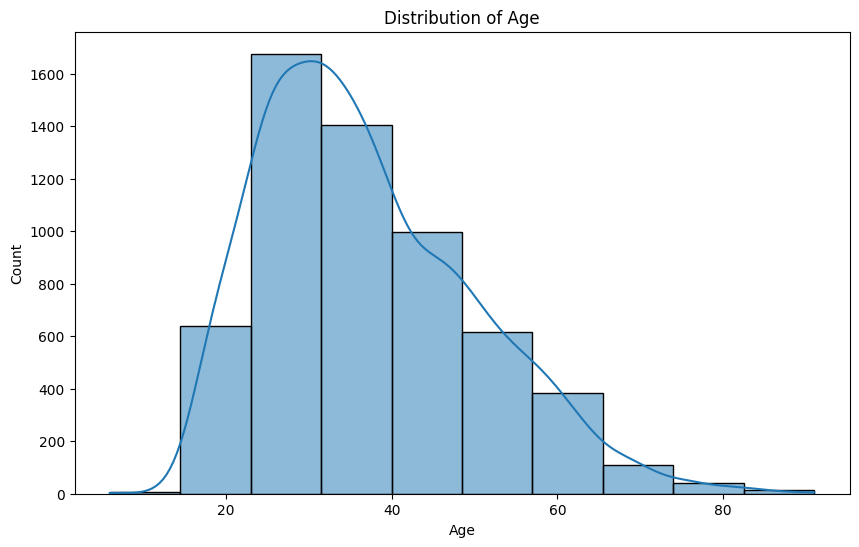

In [ ]:
# Exploratory Data Analysis (EDA)

# Plot distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(us_shootings_data['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

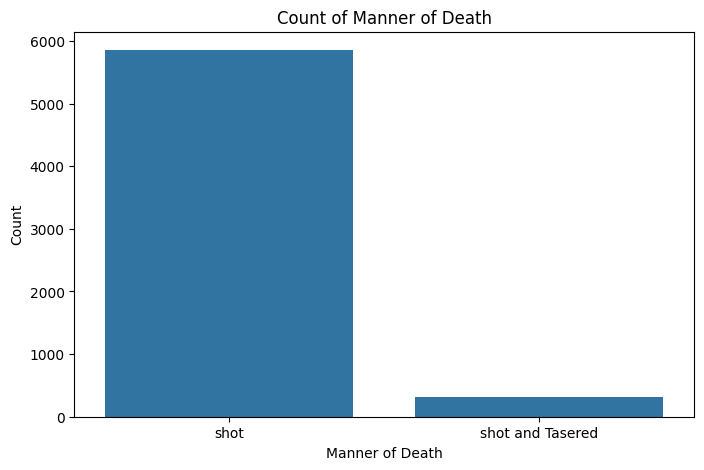

In [ ]:
# Count plot of manner_of_death
plt.figure(figsize=(8, 5))
sns.countplot(x='manner_of_death', data=us_shootings_data)
plt.title('Count of Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

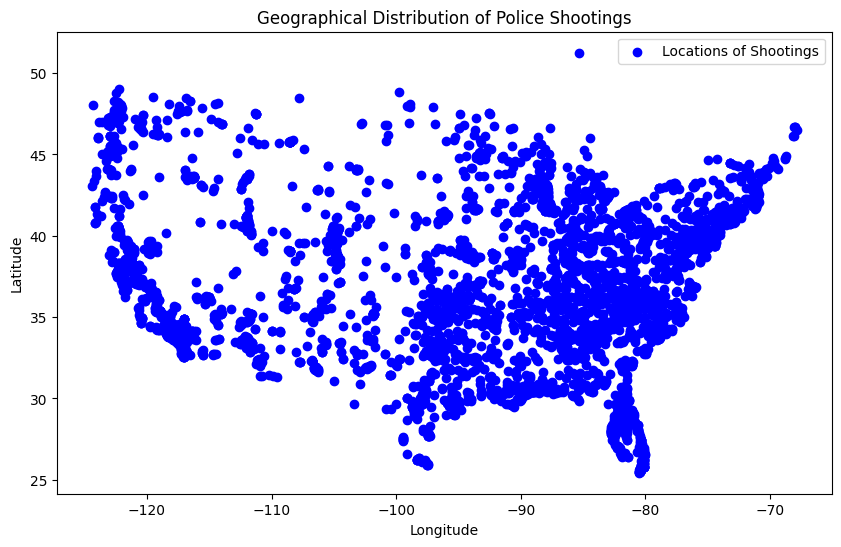

In [ ]:
# Geographical scatter plot of police shootings
plt.figure(figsize=(10, 6))
plt.scatter(us_shootings_data['longitude'], us_shootings_data['latitude'], c='blue', marker='o', label='Locations of Shootings')
plt.title('Geographical Distribution of Police Shootings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

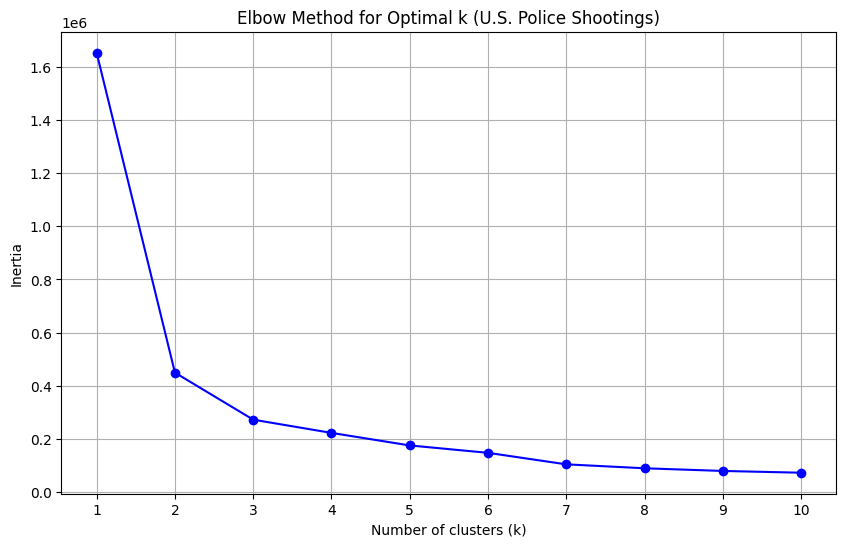

In [ ]:
# Elbow Method for Optimal Clusters

# Prepare data for KMeans clustering (latitude and longitude)
coords = us_shootings_data[['latitude', 'longitude']]

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Trying from 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(coords)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k (U.S. Police Shootings)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

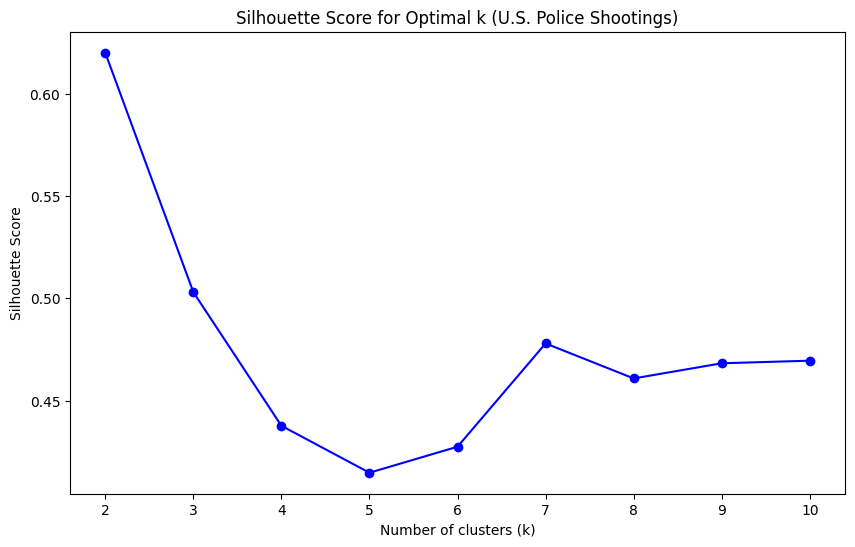

In [ ]:
from sklearn.metrics import silhouette_score
# Silhouette Score for Validation

silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for k in range(2, 11):  # From 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(coords)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(coords, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Silhouette Score for Optimal k (U.S. Police Shootings)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# K-Means Clustering with Optimal Number of Clusters

# Using the optimal number of clusters
optimal_clusters = 3  # You can decide based on the Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(coords)
us_shootings_data['cluster'] = kmeans.labels_

<ipython-input-28-9b0c666e3b82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_shootings_data['cluster'] = kmeans.labels_


In [ ]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the assigned cluster for each data point
labels = kmeans.labels_

print("Cluster Centers:", cluster_centers)
print("Cluster Labels:", labels[:10])

Cluster Centers: [[  36.72610723  -81.56381668]
 [  37.65474805 -117.55799944]
 [  35.31400394  -97.17603887]]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Display the updated DataFrame with cluster labels
print("\nK-Means Clustering Results with Optimal Clusters:")
us_shootings_data


K-Means Clustering Results with Optimal Clusters:


,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,latitude,longitude,is_geocoding_exact,manner_of_death_encoded,armed_encoded,gender_encoded,race_encoded,threat_level_encoded,flee_encoded,cluster
0,6479,La Garion Lamar Smith,2021-01-03,shot,gun,27.0,M,B,Homestead,FL,...,25.437,-80.475,True,0,35,1,1,0,1,0
1,3734,Juvan Simon,2018-05-30,shot,gun,23.0,M,B,Florida City,FL,...,25.461,-80.480,True,0,35,1,1,2,2,0
2,647,Edward Foster III,2015-07-16,shot,gun,35.0,M,B,Homestead,FL,...,25.462,-80.493,True,0,35,1,1,0,2,0
3,1480,Francis Scot Dufore,2016-04-20,shot,gun,41.0,M,W,Homestead,FL,...,25.493,-80.484,True,0,35,1,5,0,2,0
4,916,Jorge Santiago Tapia,2015-10-15,shot,gun,15.0,M,H,Miami,FL,...,25.507,-80.413,True,0,35,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6166,5607,Ryan Bass,2020-03-03,shot,gun,39.0,M,W,Riverside,WA,...,48.503,-119.506,True,0,35,1,5,0,4,1
6167,2414,Manuel Gonzalez,2017-03-12,shot,knife,28.0,M,H,Bellingham,WA,...,48.751,-122.475,True,0,48,1,2,0,1,1
6168,6111,Brandon R. Laducer,2020-08-22,shot,undetermined,35.0,M,N,Belcourt,ND,...,48.839,-99.745,True,0,86,1,3,2,4,2
6169,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,...,49.000,-122.273,True,0,85,1,5,0,2,1


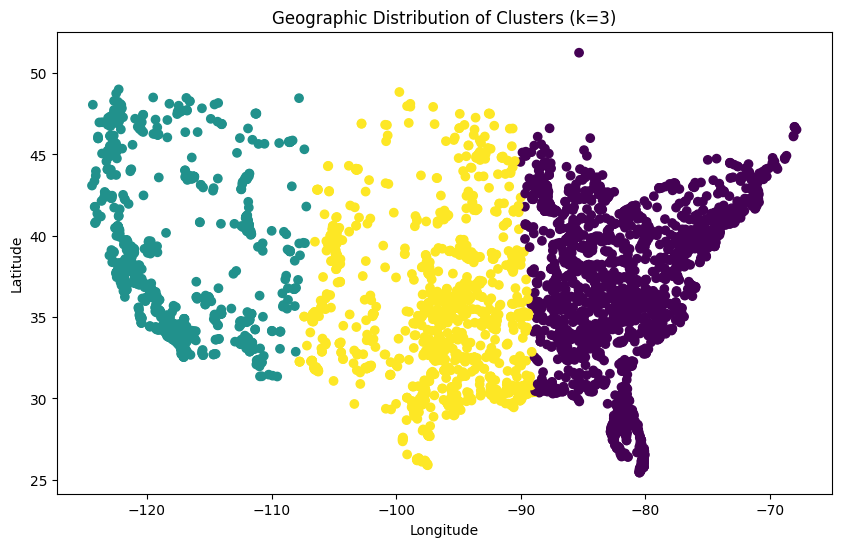

In [ ]:
# Visualize the clustering results on the map
plt.figure(figsize=(10, 6))
plt.scatter(us_shootings_data['longitude'], us_shootings_data['latitude'], c=us_shootings_data['cluster'], cmap='viridis', marker='o', label='Clustered Locations')
plt.title(f'Geographic Distribution of Clusters (k={optimal_clusters})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Count the number of incidents per cluster
incidents_by_cluster_us = us_shootings_data['cluster'].value_counts()
print("Number of Incidents by Cluster (U.S. Police Shootings):")
incidents_by_cluster_us

Number of Incidents by Cluster (U.S. Police Shootings):


,count
cluster,
0,2604
1,1794
2,1773


In [ ]:
# Manner of Death Distribution by Cluster
manner_of_death_by_cluster_us = us_shootings_data.groupby(['cluster', 'manner_of_death']).size().unstack(fill_value=0)
print("\nManner of Death Distribution by Cluster (U.S. Police Shootings):")
manner_of_death_by_cluster_us


Manner of Death Distribution by Cluster (U.S. Police Shootings):


manner_of_death,shot,shot and Tasered
cluster,,
0,2480,124
1,1693,101
2,1681,92


In [ ]:
# Armed Status Distribution by Cluster
armed_status_by_cluster_us = us_shootings_data.groupby(['cluster', 'armed']).size().unstack(fill_value=0)
print("\nArmed Status Distribution by Cluster (U.S. Police Shootings):")
armed_status_by_cluster_us


Armed Status Distribution by Cluster (U.S. Police Shootings):


armed,Airsoft pistol,BB gun,BB gun and vehicle,Taser,air conditioner,air pistol,ax,barstool,baseball bat,baseball bat and bottle,...,toy weapon,unarmed,undetermined,unknown weapon,vehicle,vehicle and gun,vehicle and machete,walking stick,wasp spray,wrench
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,6,1,13,0,0,7,1,7,0,...,90,150,61,34,79,3,0,0,1,0
1,2,3,0,6,0,0,11,0,6,1,...,90,123,58,24,54,1,1,1,0,1
2,1,3,0,12,1,1,5,0,6,0,...,39,123,54,21,61,2,0,0,0,0


In [ ]:
# Threat Level Distribution by Cluster
threat_level_by_cluster_us = us_shootings_data.groupby(['cluster', 'threat_level']).size().unstack(fill_value=0)
print("\nThreat Level Distribution by Cluster (U.S. Police Shootings):")
threat_level_by_cluster_us


Threat Level Distribution by Cluster (U.S. Police Shootings):


threat_level,attack,other,undetermined
cluster,,,
0,1734,805,65
1,1045,688,61
2,1180,524,69
